In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from scipy.stats import zscore
from scipy import stats
import matplotlib.pyplot as plt


In [42]:
df = pd.read_csv(r'C:\Users\mehak\Documents\GitHub\Machine-Learning-project\Datasets\Video_Games_Sales_as_at_22_Dec_2016.csv')
print(df.head())

                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating 

In [43]:
# Handling Missing Values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


In [44]:
df.dropna(inplace=True)
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


In [45]:
# Replace 'tbd' with NaN
df['User_Score'] = df['User_Score'].replace('tbd', np.nan)
# Convert to float
df['User_Score'] = pd.to_numeric(df['User_Score'])

In [46]:
df = df.dropna(subset=['User_Score'])

In [47]:
categorical_cols = df.select_dtypes(include=['object']).columns
print (categorical_cols)

Index(['Name', 'Platform', 'Genre', 'Publisher', 'Developer', 'Rating'], dtype='object')


In [56]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Use only these 7 features
features_to_use = [
    'Platform', 'Year_of_Release', 'Publisher',
    'Critic_Score', 'User_Score', 'Rating', 'Developer'
]


# Label encode categorical features
categorical_cols = ['Platform', 'Publisher', 'Rating', 'Developer','Genre']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df[features_to_use].copy()
y = df['Genre']  # Target

# Save the selected features list
selected_features = features_to_use

# Scale numerical features
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[['Year_of_Release', 'Critic_Score', 'User_Score']] = scaler.fit_transform(
    X[['Year_of_Release', 'Critic_Score', 'User_Score']]
)

In [57]:
X

,Platform,Year_of_Release,Publisher,Critic_Score,User_Score,Rating,Developer
0,12,2006.0,160,76.0,8.0,1,771
2,12,2008.0,160,82.0,8.3,1,771
3,12,2009.0,160,80.0,8.0,1,771
6,2,2006.0,160,89.0,8.5,1,771
7,12,2006.0,160,58.0,6.6,1,771
...,...,...,...,...,...,...,...
16667,3,2001.0,158,46.0,2.4,1,411
16677,3,2002.0,146,81.0,8.8,4,260
16696,5,2014.0,123,80.0,7.6,4,617
16700,5,2011.0,53,61.0,5.8,6,99


In [58]:
y

0        10
2         6
3        10
6         4
7         3
         ..
16667     0
16677     2
16696     0
16700     8
16706    11
Name: Genre, Length: 6825, dtype: int64

In [59]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [60]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

In [61]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X)

In [62]:
#Cluster validation
print("K-Means Silhouette Score:", silhouette_score(X, kmeans_labels))
print("Agglomerative Silhouette Score:", silhouette_score(X, agglo_labels))


K-Means Silhouette Score: 0.5297300908530896
Agglomerative Silhouette Score: 0.47885369645772574


In [63]:
#Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [64]:
#Find optimal k using Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

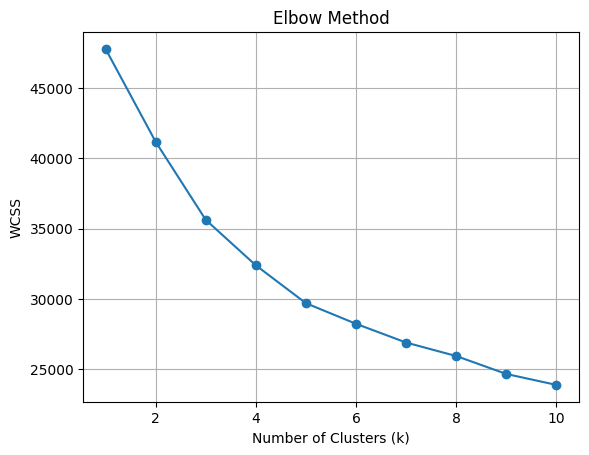

In [65]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [66]:
# Check Silhouette Scores
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score for k={k}: {score:.3f}")

Silhouette Score for k=2: 0.139
Silhouette Score for k=3: 0.146
Silhouette Score for k=4: 0.140
Silhouette Score for k=5: 0.150
Silhouette Score for k=6: 0.140
Silhouette Score for k=7: 0.140
Silhouette Score for k=8: 0.136
Silhouette Score for k=9: 0.151
Silhouette Score for k=10: 0.143


In [67]:
#  Apply KMeans with optimal k (e.g., k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [68]:
# Add cluster labels to the original DataFrame
df.loc[X.index, 'Cluster'] = kmeans.labels_

In [69]:
print("\nCluster Labels:", kmeans.labels_)
print("Centroids (scaled):\n", kmeans.cluster_centers_)
print(f"Inertia (WCSS): {kmeans.inertia_:.2f}")


Cluster Labels: [1 1 1 ... 1 2 1]
Centroids (scaled):
 [[ 0.02916013 -0.25194372 -0.80598303  0.3640549   0.37797975  0.10264579
  -0.50130692]
 [-0.06950007  0.10166336  0.87053603  0.33227791  0.38010552 -0.05911485
   0.54416341]
 [ 0.07564914  0.25993697 -0.16713718 -1.25318609 -1.36543589 -0.07349422
  -0.10891157]]
Inertia (WCSS): 35614.21


In [70]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

# Select numeric features
X = df.select_dtypes(include=['int64', 'float64']).dropna()

In [71]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

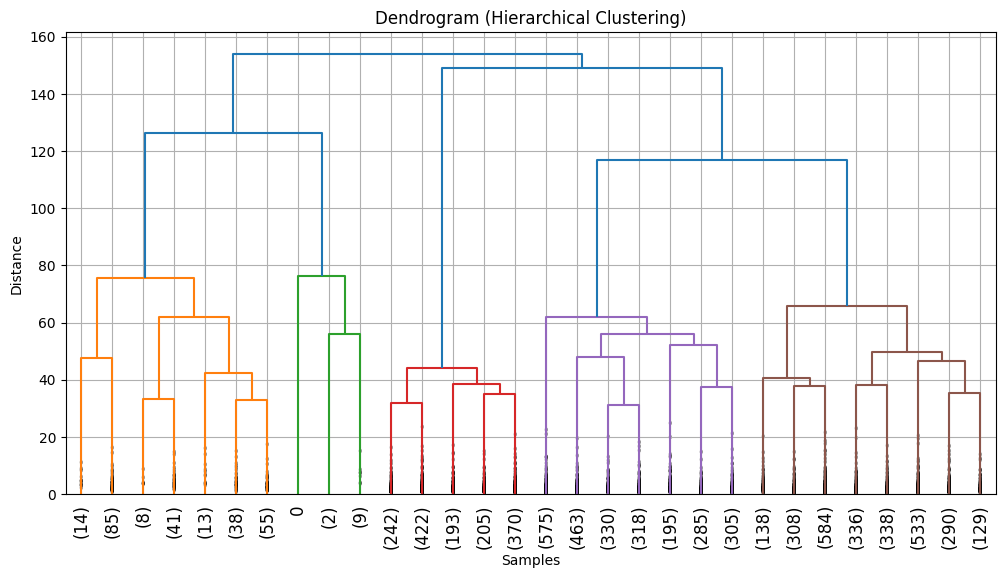

In [72]:
# Plot dendrogram to decide number of clusters
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Dendrogram (Hierarchical Clustering)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

In [73]:
#Apply Agglomerative Clustering
n_clusters = 3  # Choose based on dendrogram
hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
labels = hc.fit_predict(X_scaled)


In [74]:
# Add cluster labels to original DataFrame
df.loc[X.index, 'Cluster_HC'] = labels

In [75]:
#cluster distribution
print(df['Cluster_HC'].value_counts())

Cluster_HC
1.0    5127
2.0    1432
0.0     266
Name: count, dtype: int64


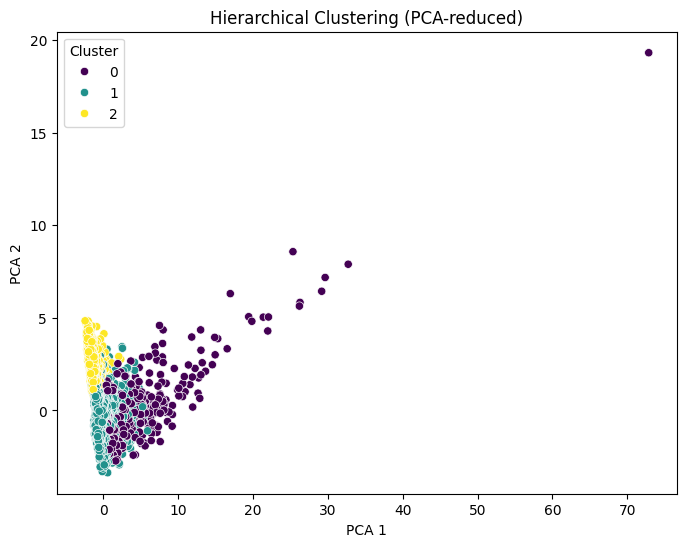

In [76]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis')
plt.title('Hierarchical Clustering (PCA-reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

In [77]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Apply PCA
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X)
X_test_pca = pca.transform(X)

# Train a classifier on PCA-transformed data
clf_pca = LogisticRegression(max_iter=1000)
clf_pca.fit(X_pca, y)
y_pred_pca = clf_pca.predict(X_pca)

# Evaluate accuracy
accuracy_pca = accuracy_score(y, y_pred_pca)
print(f"Accuracy using PCA: {accuracy_pca:.4f}")


Accuracy using PCA: 0.2651


In [78]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define the Autoencoder model
input_dim = X.shape[1]
encoding_dim = 5

input_layer = Input(shape=(input_dim,))
encoded = Dense(8, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
encoder = Model(inputs=input_layer, outputs=encoded)

autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X, X, epochs=10, batch_size=256, shuffle=True, validation_split=0.2, verbose=1)


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 654952.3125 - val_loss: 520516.8438
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 528222.3750 - val_loss: 444047.0000
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 454399.5000 - val_loss: 393683.6875
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 413169.7500 - val_loss: 359054.1250
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 374157.0000 - val_loss: 335619.8438
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 349333.5938 - val_loss: 322012.2500
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 339210.8125 - val_loss: 312576.8750
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 326974.5000 - val_loss: 305504.1562
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 321199.0000 - val_loss: 298730.6562
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 316348.9375 - val_loss: 291709.0938


In [79]:
from sklearn.metrics import classification_report


# If you're using KMeans and clustering, rename labels logically (optional)
# For example, convert cluster 0 and 1 to label names:
y_pred_named = ["Genere" if label == 1 else "No Genere" for label in y_pred_pca]

# If your target (y) is not already 0/1 or Genere/No Genere, fix that too:
y_named = ["Genere" if label == 1 else "No Genere" for label in y]

# Now print the classification report
print("=== Classification Report: PCA ===")
print(classification_report(y_named, y_pred_named, target_names=["No Genere", "Genere"]))


=== Classification Report: PCA ===
              precision    recall  f1-score   support

   No Genere       0.00      0.00      0.00       248
      Genere       0.96      1.00      0.98      6577

    accuracy                           0.96      6825
   macro avg       0.48      0.50      0.49      6825
weighted avg       0.93      0.96      0.95      6825



c:\Users\mehak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mehak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mehak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [80]:
from sklearn.metrics import classification_report
import numpy as np

# Get reconstructed data from the autoencoder
X_pred = autoencoder.predict(X)

# Compute reconstruction error
reconstruction_error = np.mean(np.power(X - X_pred, 2), axis=1)

# Set threshold (e.g., 95th percentile)
threshold = np.percentile(reconstruction_error, 95)

# Predict classes based on threshold
y_pred_ae = (reconstruction_error > threshold).astype(int)

# Ensure y is in binary format (0 and 1)
if y.dtype == 'object':
    y = y.map({'No Genere': 0, 'Genere': 1})

# Print classification report
print("=== Classification Report: Autoencoder ===")
print(classification_report(y_named, y_pred_named, target_names=["No Genere", "Genere"]))


214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
=== Classification Report: Autoencoder ===
              precision    recall  f1-score   support

   No Genere       0.00      0.00      0.00       248
      Genere       0.96      1.00      0.98      6577

    accuracy                           0.96      6825
   macro avg       0.48      0.50      0.49      6825
weighted avg       0.93      0.96      0.95      6825



c:\Users\mehak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mehak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mehak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo